#1) Prepare a prediction model for profit of 50_startups data.
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.
#50_startups

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups (2).csv


In [3]:
Data=pd.read_csv('50_Startups.csv')
Data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
Data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
Data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
Data=pd.get_dummies(Data,columns=['State'])
Data.head()
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#Data['State']=le.fit_transform(Data['State'])

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [8]:
Data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [9]:
Data.rename(columns={'R&D Spend':'RD_spend','Marketing Spend':'Marketing_Spend','State_New York':'State_New_York'},inplace=True)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

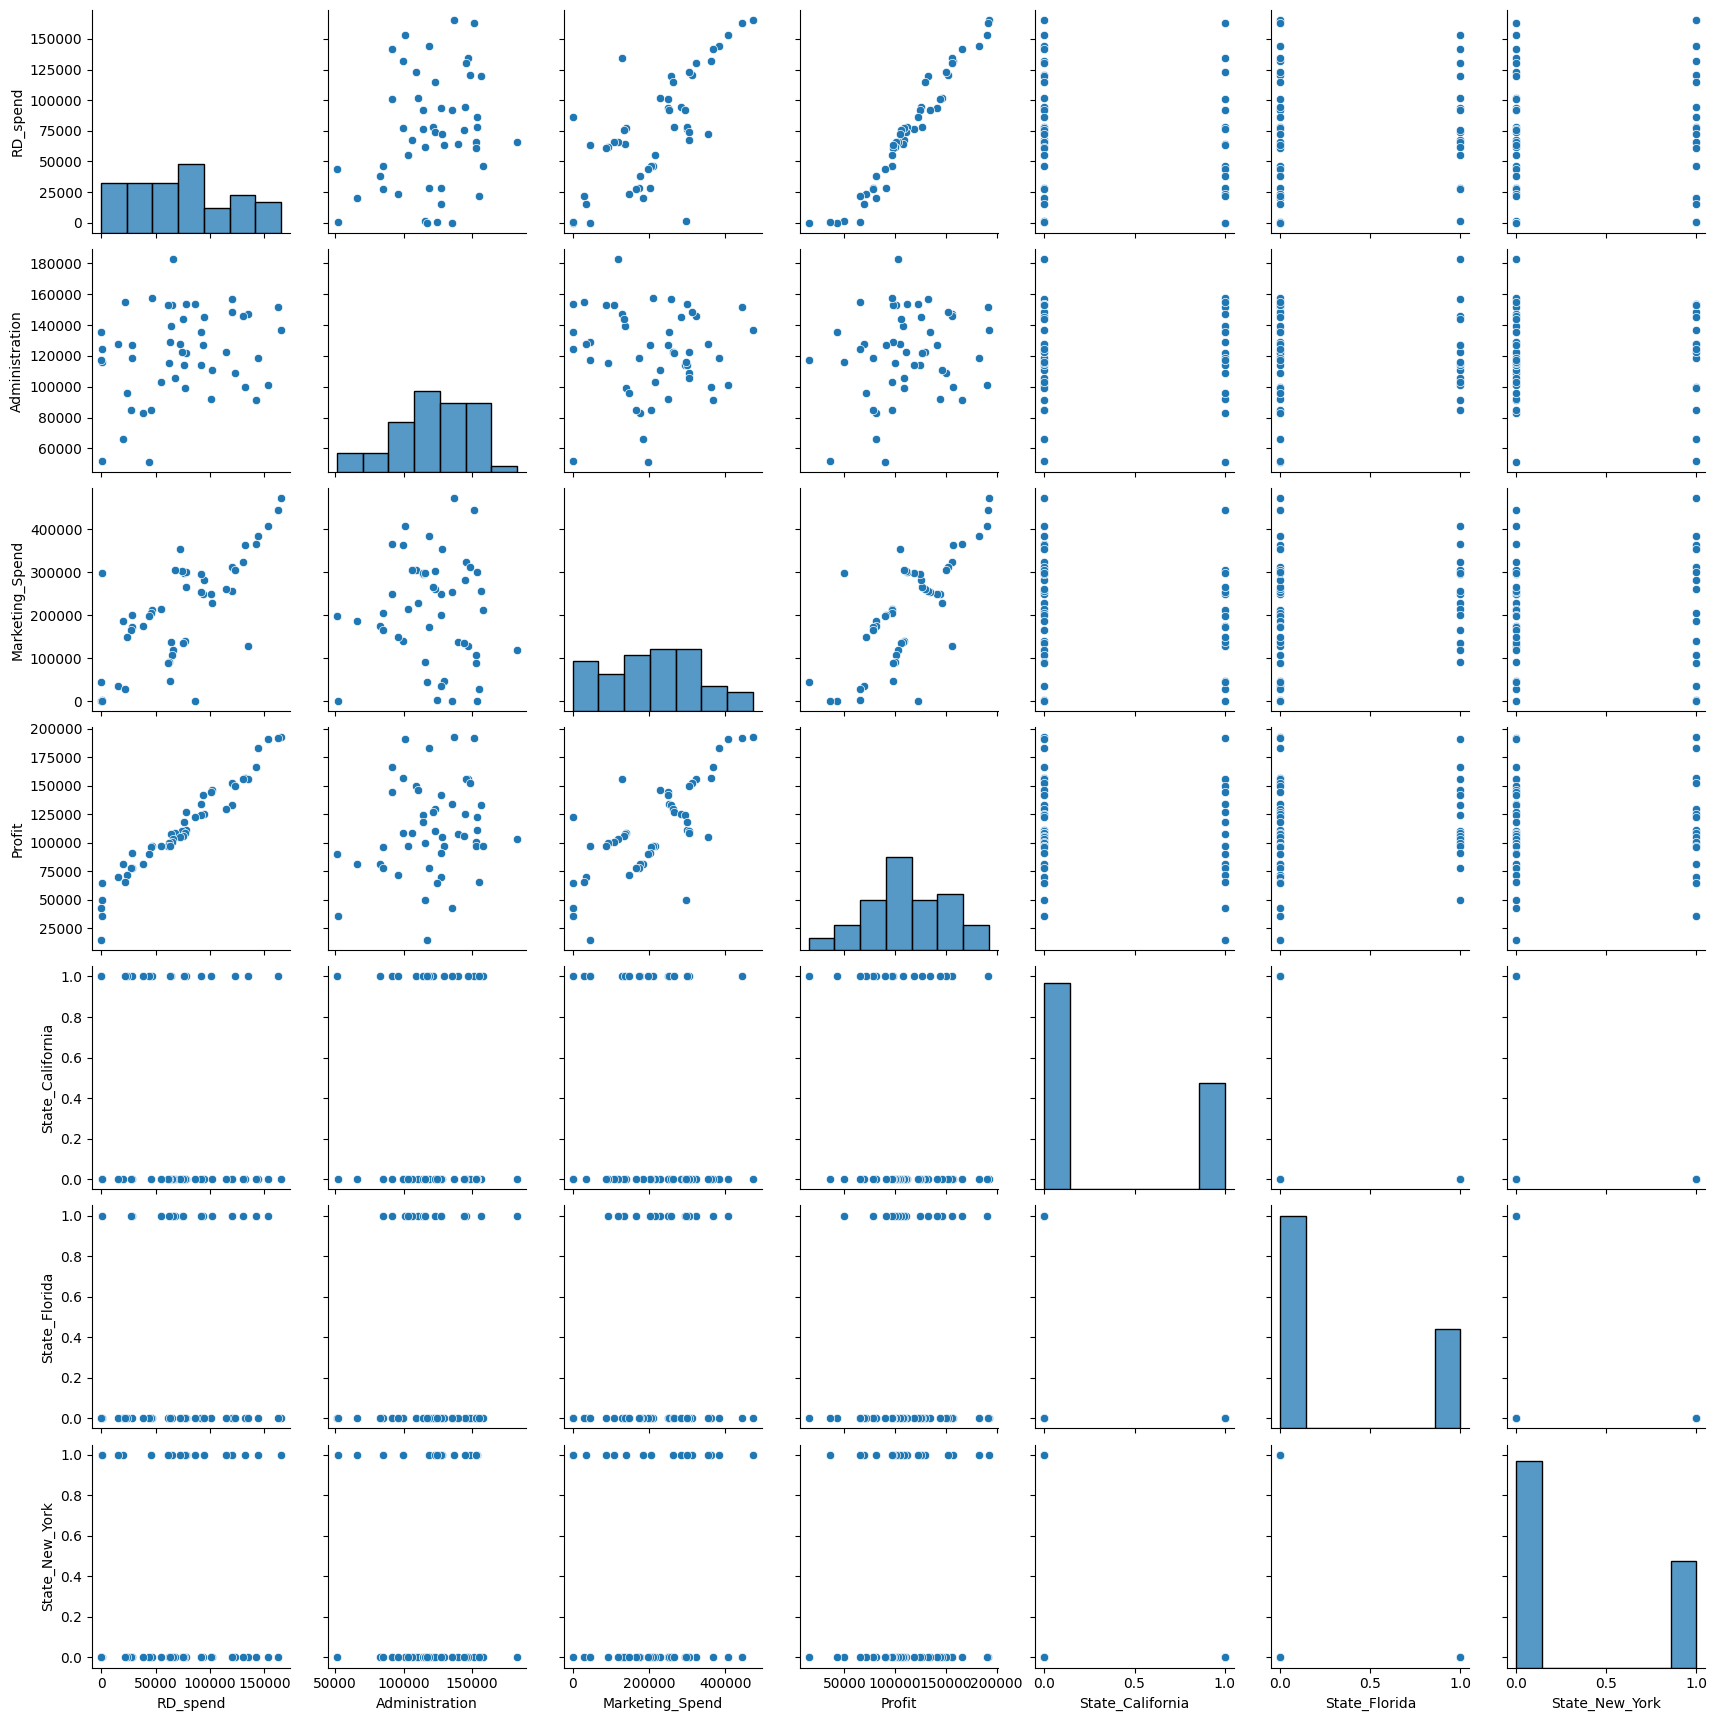

In [11]:
import seaborn as sns
sns.pairplot(Data)

cooks plot

In [12]:
import statsmodels.api as sm

In [13]:
X = Data[['RD_spend', 'Administration']]  # Specify your independent variables
X = sm.add_constant(X)  # Add a constant for the intercept
y = Data['Profit']  # Specify your dependent variable

model = sm.OLS(y, X).fit()  # Fit the linear regression model

In [14]:
infl = model.get_influence()
c,p_value=infl.cooks_distance

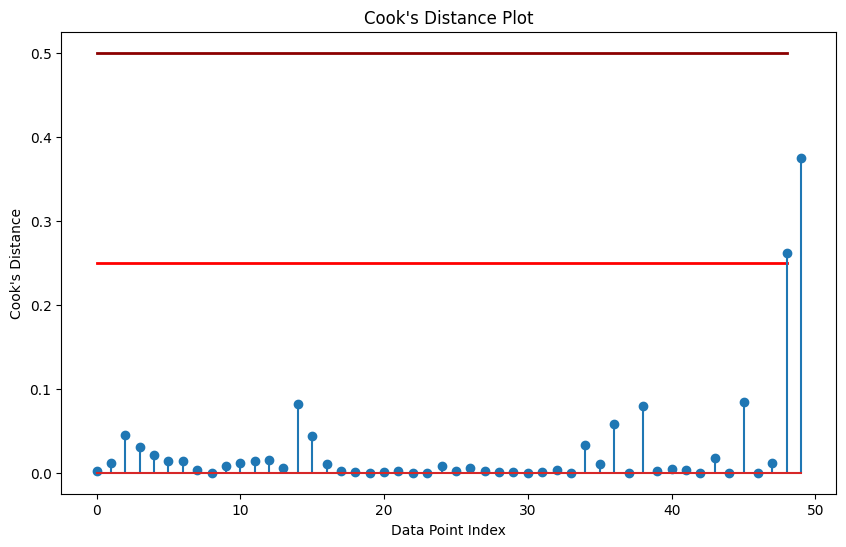

In [15]:
plt.figure(figsize=(10, 6))
x=[0,48]
y=[.5,.5]
plt.plot(x,y,color='darkred',linewidth=2)
y1=[0.25,0.25]
plt.plot(x,y1,color='red',linewidth=2)
plt.stem(np.arange(len(Data)),np.round(c,3))
plt.xlabel("Data Point Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

In [16]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD_spend+Administration+Marketing_Spend+State_California+State_Florida+State_New_York',data=Data).fit()

In [17]:
model.params

Intercept           37633.233317
RD_spend                0.806023
Administration         -0.027004
Marketing_Spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_New_York      12450.223495
dtype: float64

In [18]:
model.fittedvalues

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292789
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725742
19    115594.188411
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364708
46     56272.992679
47     46468.232003
48     49123.073082
49     48185.038790


In [19]:
model.resid

0      -128.741365
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782789
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825742
19     7182.671589
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396605
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518953
42      922.496288
43     9658.711782
44      615.182788
45    17337.715292
46    -6782.242679
47    -3908.502003
48   -13449.663082
49   -33503.638790
dtype: float64

In [20]:
Data['predited']=model.fittedvalues
Data

,RD_spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York,predited
0,165349.20,136897.80,471784.10,192261.83,0,0,1,192390.571365
1,162597.70,151377.59,443898.53,191792.06,1,0,0,189071.320106
2,153441.51,101145.55,407934.54,191050.39,0,1,0,182276.186735
3,144372.41,118671.85,383199.62,182901.99,0,0,1,173584.976191
4,142107.34,91391.77,366168.42,166187.94,0,1,0,172277.133819
5,131876.90,99814.71,362861.36,156991.12,0,0,1,163473.807120
6,134615.46,147198.87,127716.82,156122.51,1,0,0,158099.292789
7,130298.13,145530.06,323876.68,155752.60,0,1,0,160155.644651
8,120542.52,148718.95,311613.29,152211.77,0,0,1,151634.743327
9,123334.88,108679.17,304981.62,149759.96,1,0,0,154829.662529


In [21]:
Data['Error']=model.resid
Data

,RD_spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York,predited,Error
0,165349.20,136897.80,471784.10,192261.83,0,0,1,192390.571365,-128.741365
1,162597.70,151377.59,443898.53,191792.06,1,0,0,189071.320106,2720.739894
2,153441.51,101145.55,407934.54,191050.39,0,1,0,182276.186735,8774.203265
3,144372.41,118671.85,383199.62,182901.99,0,0,1,173584.976191,9317.013809
4,142107.34,91391.77,366168.42,166187.94,0,1,0,172277.133819,-6089.193819
5,131876.90,99814.71,362861.36,156991.12,0,0,1,163473.807120,-6482.687120
6,134615.46,147198.87,127716.82,156122.51,1,0,0,158099.292789,-1976.782789
7,130298.13,145530.06,323876.68,155752.60,0,1,0,160155.644651,-4403.044651
8,120542.52,148718.95,311613.29,152211.77,0,0,1,151634.743327,577.026673
9,123334.88,108679.17,304981.62,149759.96,1,0,0,154829.662529,-5069.702529


In [22]:
model.params

Intercept           37633.233317
RD_spend                0.806023
Administration         -0.027004
Marketing_Spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_New_York      12450.223495
dtype: float64

In [23]:
model.pvalues

Intercept           2.807645e-09
RD_spend            2.578772e-21
Administration      6.077373e-01
Marketing_Spend     1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_New_York      9.409010e-06
dtype: float64

In [24]:
model.rsquared

0.9507524843355148

In [25]:
model.rsquared_adj

0.945156175737278

In [26]:
rsq_RD_spend=smf.ols('RD_spend~Profit+Administration+Marketing_Spend+State_California+State_Florida+State_New_York',data=Data).fit().rsquared
rsq_RD_spend
rsq_Profit=smf.ols('Profit~RD_spend+Administration+Marketing_Spend+State_California+State_Florida+State_New_York',data=Data).fit().rsquared
rsq_Profit
rsq_Administration=smf.ols('Administration~Profit+Marketing_Spend+State_California+State_Florida+State_New_York',data=Data).fit().rsquared
rsq_Administration
rsq_Marketing_Spend=smf.ols('Marketing_Spend~Profit+RD_spend+Administration+State_California+State_Florida+State_New_York',data=Data).fit().rsquared
rsq_Marketing_Spend
rsq_State_California=smf.ols('State_California~Marketing_Spend+Profit+RD_spend+Administration+State_Florida+State_New_York',data=Data).fit().rsquared
rsq_State_California
rsq_State_Florida=smf.ols('State_Florida~State_California+Marketing_Spend+Profit+RD_spend+Administration+State_New_York',data=Data).fit().rsquared
rsq_State_Florida
rsq_State_New_York=smf.ols('State_New_York~State_Florida+State_California+Marketing_Spend+Profit+RD_spend+Administration',data=Data).fit().rsquared
rsq_State_New_York
d1={'Variables':['RD_spend','Administration','Marketing_Spend','State_California','State_Florida','State_New_York','Profit'],
    'RSquared':[rsq_RD_spend,rsq_Administration,rsq_Marketing_Spend,rsq_State_California,rsq_State_Florida,rsq_State_New_York,rsq_Profit]}
RSQ_frame=pd.DataFrame(d1)
RSQ_frame
#  pd.DataFrame()

,Variables,RSquared
0,RD_spend,0.948992
1,Administration,0.117059
2,Marketing_Spend,0.608282
3,State_California,1.000000
4,State_Florida,1.000000
5,State_New_York,1.000000
6,Profit,0.950752


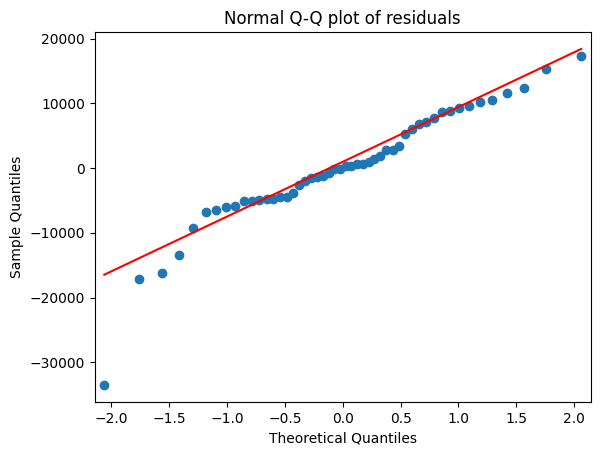

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<Axes: >

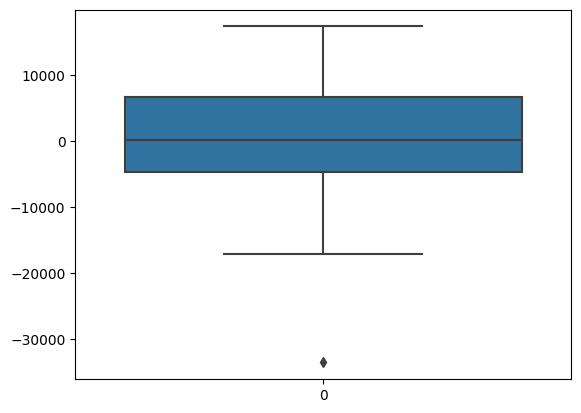

In [28]:
import seaborn as sns
sns.boxplot(model.resid)

#2) Consider only the below columns and prepare a prediction model for predicting Price.

#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
#Toyota Corolla


In [29]:
import pandas as pd
import numpy as np


In [30]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [31]:
data=pd.read_csv('ToyotaCorolla.csv',encoding = 'Latin-1',sep =',')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [33]:
data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [34]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [35]:
data=data.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [36]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


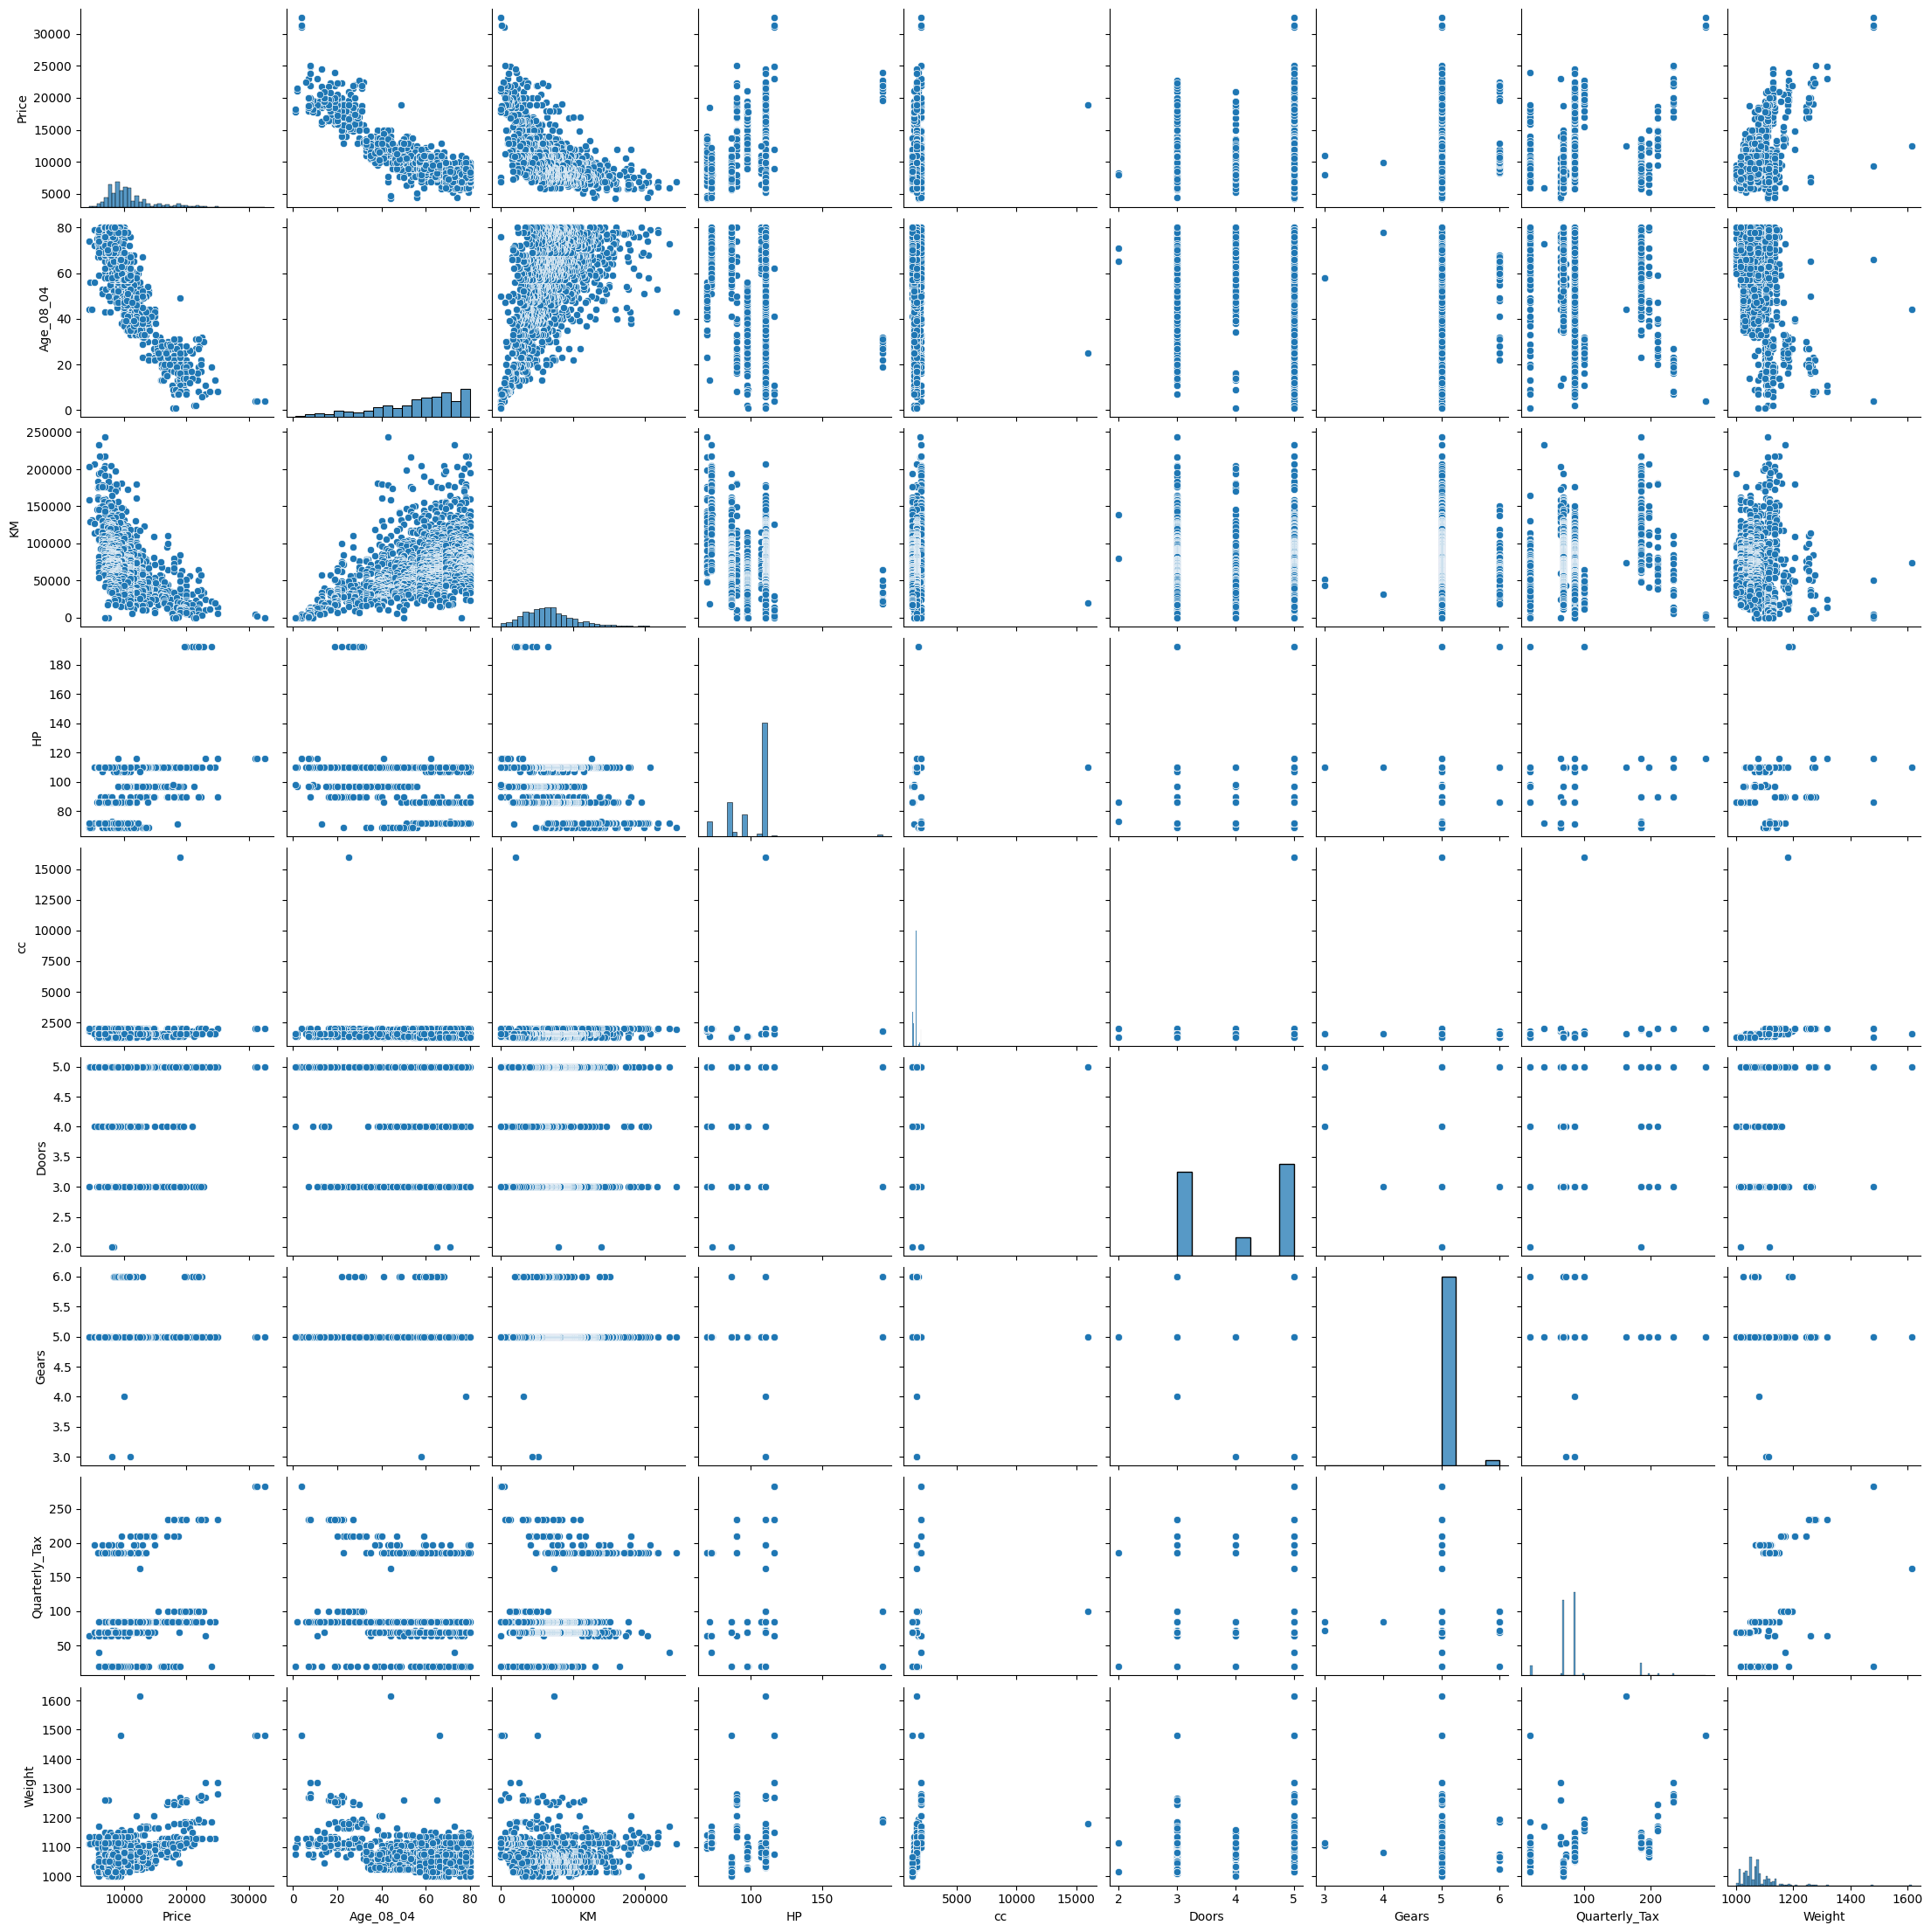

In [37]:
import seaborn as sns
#import metplotlib.pyplot as plt
sns.pairplot(data)

<Axes: >

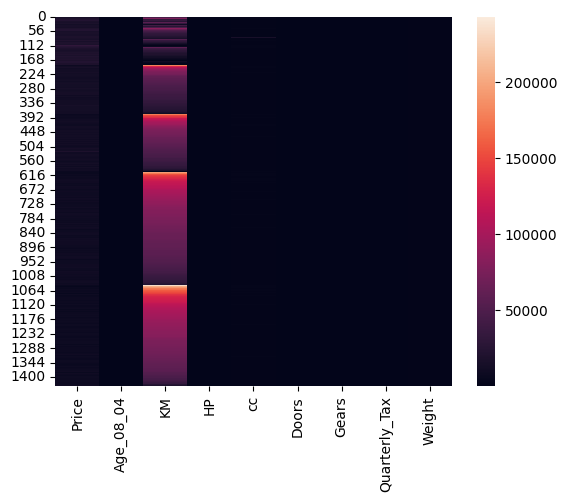

In [38]:
sns.heatmap(data)

<ipython-input-39-40c10e8c4001>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: ylabel='Density'>

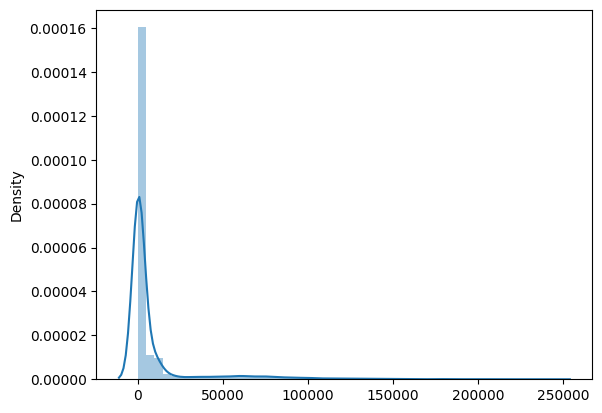

In [39]:
sns.distplot(data)

In [50]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,predicts,Error
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010


In [56]:
import statsmodels.api as sm
X = data[['KM','predicts']]  # Specify your independent variables
X = sm.add_constant(X)  # Add a constant for the intercept
y = data['Price']  # Specify your dependent variable

model = sm.OLS(y, X).fit()  # Fit the linear regression model

In [57]:
infl = model.get_influence()
c,p_value=infl.cooks_distance

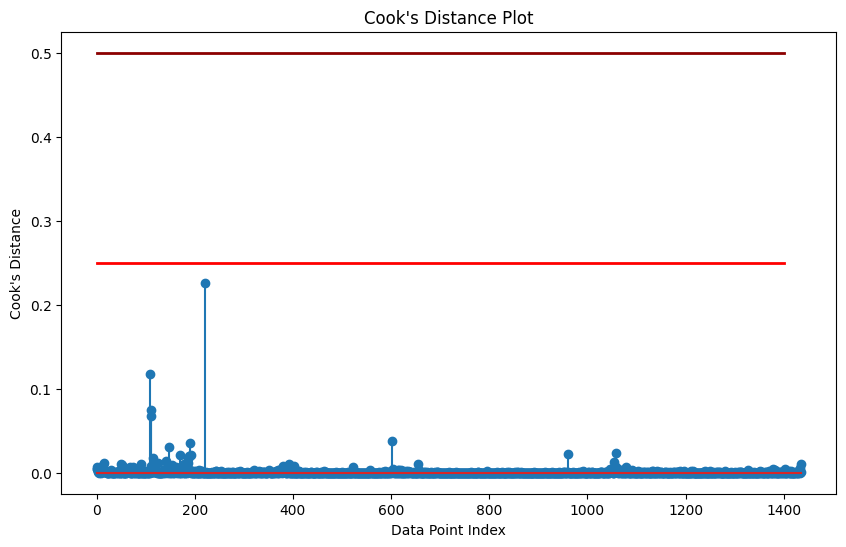

In [59]:
plt.figure(figsize=(10, 6))
x=[0,1400]
y=[.5,.5]
plt.plot(x,y,color='darkred',linewidth=2)
y1=[0.25,0.25]
plt.plot(x,y1,color='red',linewidth=2)
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Data Point Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

In [60]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()

In [61]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [42]:
model.fittedvalues

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [43]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

In [44]:
data['predicts']=model.fittedvalues
data['Error']=model.resid
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,predicts,Error
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [45]:
model.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [46]:
model.rsquared

0.8637627463428191

In [62]:
model.rsquared_adj

0.8629989775766962